In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

df = pd.read_csv('../data/creditcard.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Class'].value_counts())
print(f"\nFraud Percentage: {df['Class'].sum() / len(df) * 100:.4f}%")


Dataset Shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

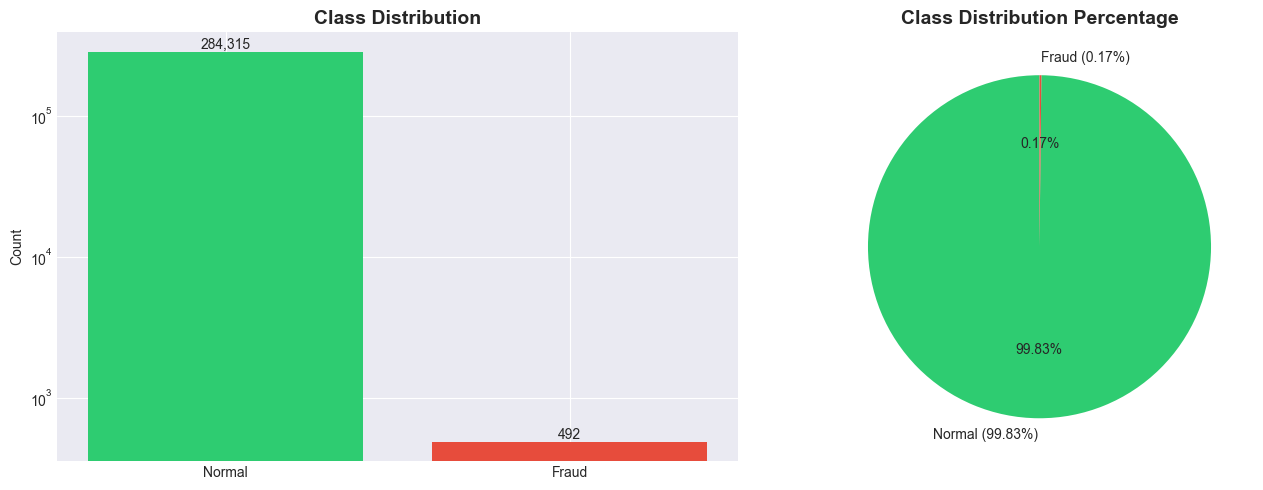

✅ Figure saved to figures/class_distribution.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

class_counts = df['Class'].value_counts()
axes[0].bar(['Normal', 'Fraud'], class_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

axes[1].pie(class_counts.values, labels=['Normal (99.83%)', 'Fraud (0.17%)'],
            autopct='%1.2f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to figures/class_distribution.png")


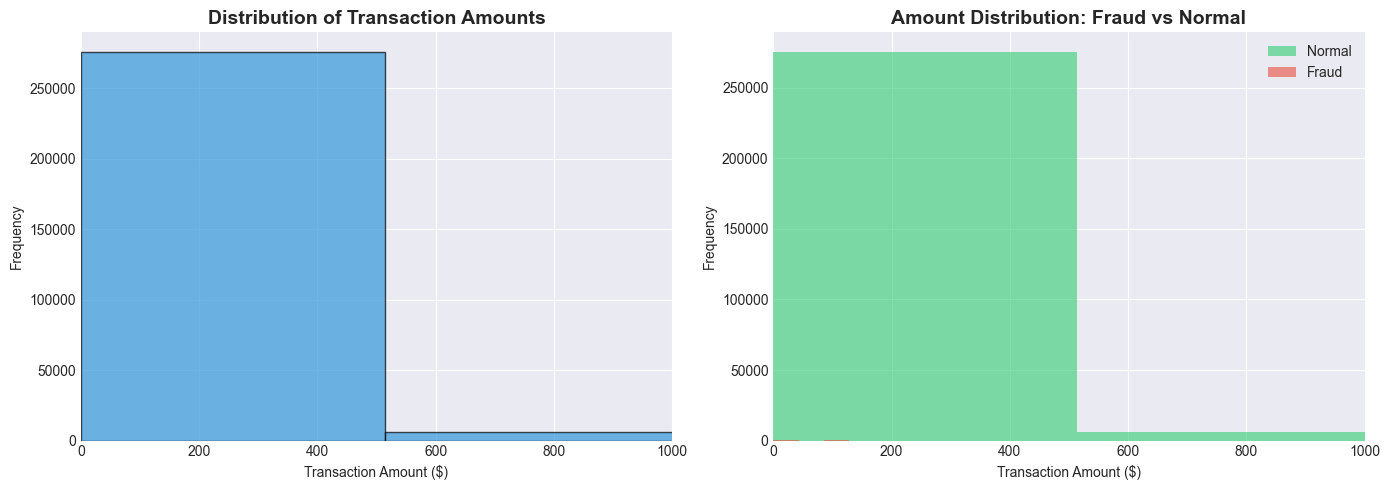

✅ Figure saved to figures/amount_distribution.png

Amount Statistics:
Normal transactions - Mean: $88.29, Median: $22.00
Fraud transactions - Mean: $122.21, Median: $9.25


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Amount'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Transaction Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Transaction Amounts', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1000)

fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

axes[1].hist(normal['Amount'], bins=50, color='#2ecc71', alpha=0.6, label='Normal')
axes[1].hist(fraud['Amount'], bins=50, color='#e74c3c', alpha=0.6, label='Fraud')
axes[1].set_xlabel('Transaction Amount ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Amount Distribution: Fraud vs Normal', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].set_xlim(0, 1000)

plt.tight_layout()
plt.savefig('../figures/amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to figures/amount_distribution.png")

print("\nAmount Statistics:")
print(f"Normal transactions - Mean: ${normal['Amount'].mean():.2f}, Median: ${normal['Amount'].median():.2f}")
print(f"Fraud transactions - Mean: ${fraud['Amount'].mean():.2f}, Median: ${fraud['Amount'].median():.2f}")


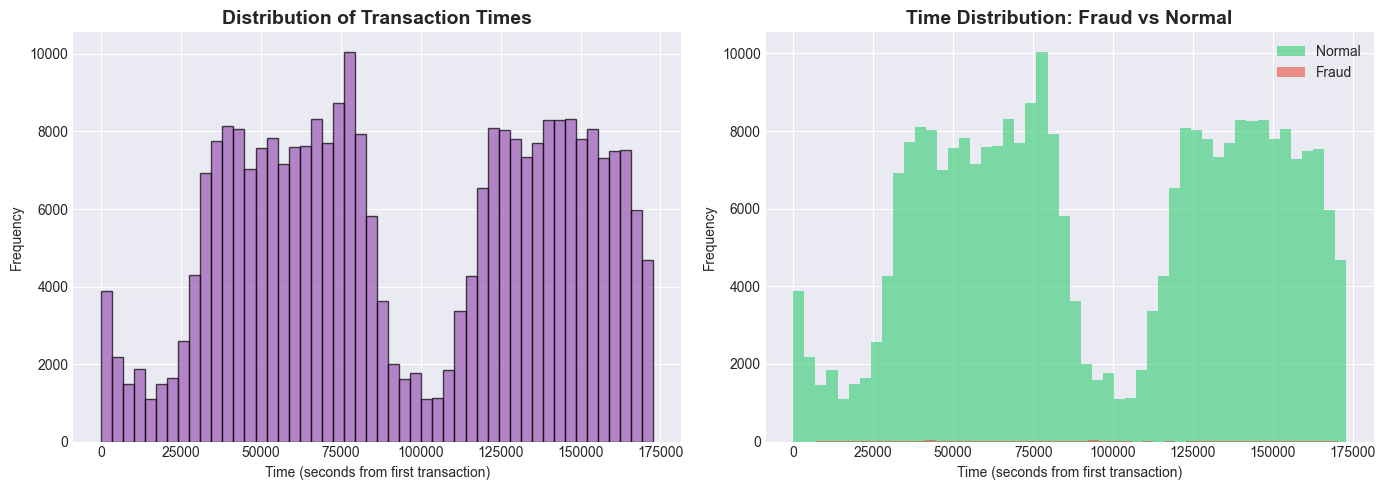

✅ Figure saved to figures/time_distribution.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Time'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Time (seconds from first transaction)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Transaction Times', fontsize=14, fontweight='bold')

axes[1].hist(normal['Time'], bins=50, color='#2ecc71', alpha=0.6, label='Normal')
axes[1].hist(fraud['Time'], bins=50, color='#e74c3c', alpha=0.6, label='Fraud')
axes[1].set_xlabel('Time (seconds from first transaction)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Time Distribution: Fraud vs Normal', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../figures/time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to figures/time_distribution.png")


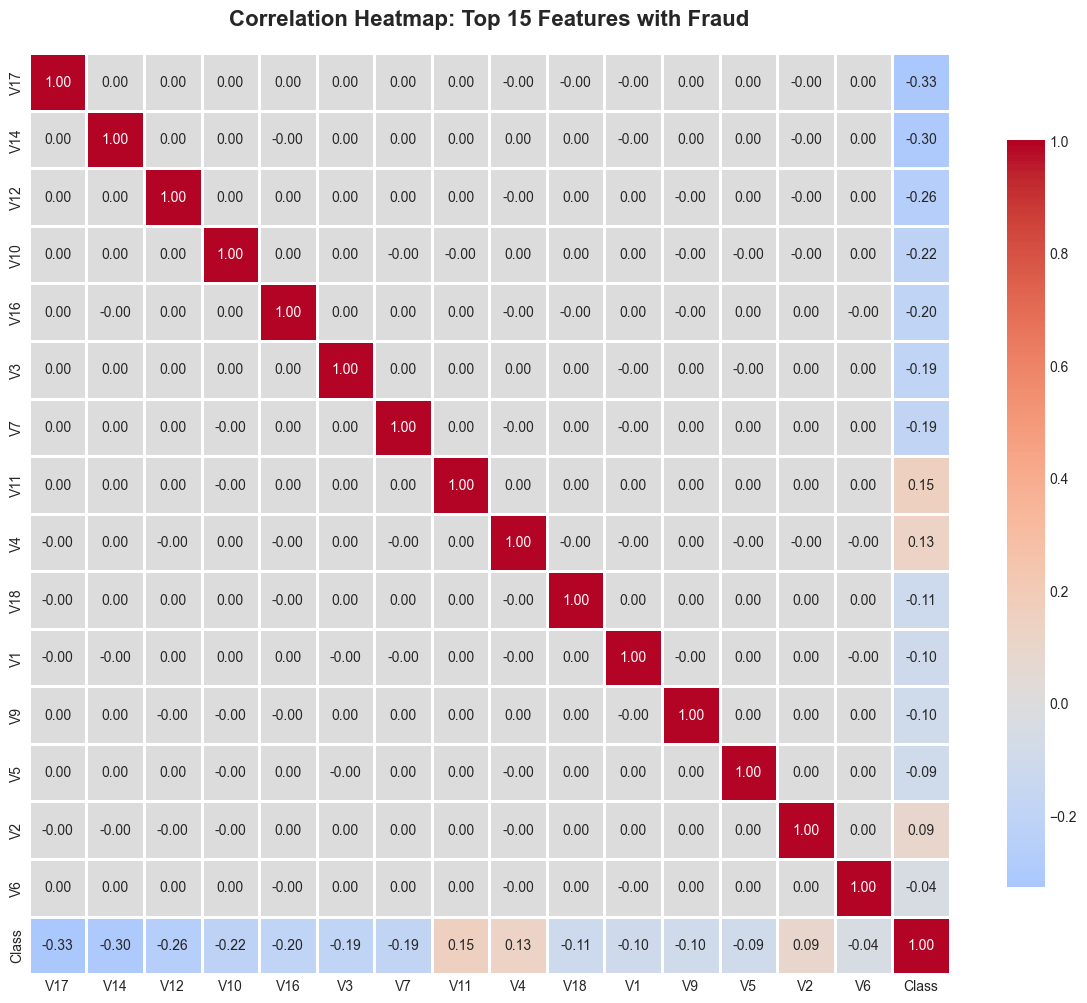

✅ Figure saved to figures/correlation_heatmap.png

Top 10 Features Correlated with Fraud:
V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
Name: Class, dtype: float64


In [ ]:
correlation_with_class = df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)

top_features = correlation_with_class[1:16].index.tolist()
top_features.append('Class')

corr_matrix = df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap: Top 15 Features with Fraud', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to figures/correlation_heatmap.png")
print("\nTop 10 Features Correlated with Fraud:")
print(correlation_with_class[1:11])


In [ ]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)
print(f"\n Dataset Size: {df.shape[0]:,} transactions, {df.shape[1]} features")
print(f" Time Range: {df['Time'].min():.0f} to {df['Time'].max():.0f} seconds ({df['Time'].max()/3600:.1f} hours)")
print(f" Amount Range: ${df['Amount'].min():.2f} to ${df['Amount'].max():.2f}")
print(f"\n Class Distribution:")
print(f"   Normal: {(df['Class']==0).sum():,} ({(df['Class']==0).sum()/len(df)*100:.2f}%)")
print(f"   Fraud:  {(df['Class']==1).sum():,} ({(df['Class']==1).sum()/len(df)*100:.2f}%)")
print(f"\n  Imbalance Ratio: {(df['Class']==0).sum() / (df['Class']==1).sum():.1f}:1")
print(f"\n Missing Values: {df.isnull().sum().sum()} (None)")
print(f"\n Top 3 Features Correlated with Fraud:")
for i, (feature, corr) in enumerate(correlation_with_class[1:4].items(), 1):
    print(f"   {i}. {feature}: {corr:.44f}")

print("\n" + "="*80)
print("Exploration complete! All figures saved to figures/ folder.")
print("="*80)


EXPLORATORY DATA ANALYSIS SUMMARY

📊 Dataset Size: 284,807 transactions, 31 features
📅 Time Range: 0 to 172792 seconds (48.0 hours)
💰 Amount Range: $0.00 to $25691.16

🎯 Class Distribution:
   Normal: 284,315 (99.83%)
   Fraud:  492 (0.17%)

⚠️  Imbalance Ratio: 577.9:1

✅ Missing Values: 0 (None)

🔍 Top 3 Features Correlated with Fraud:
   1. V17: 0.32648106724371594999922763236099854111671448
   2. V14: 0.30254369580440282350153324841812718659639359
   3. V12: 0.26059292487722485187617849078378640115261078

Exploration complete! All figures saved to figures/ folder.
